In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
#         print(os.path.join(dirname, filename))
        pass

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
# input folder
from pathlib import Path
Path('/kaggle/working/oral-diseases/').mkdir(parents=True, exist_ok=True)

In [3]:
import shutil
import os

# Caries.
# The source path
caries_file_path = Path('/kaggle/input/oral-diseases/Data caries/Data caries/caries augmented data set/preview')

# The destination path
caries_new_directory = Path('/kaggle/working/oral-diseases/caries')

# Copying data from input folder to working folder
shutil.copytree(caries_file_path, caries_new_directory)

PosixPath('/kaggle/working/oral-diseases/caries')

In [4]:
# Calculus
# The source path
calculus_file_path = Path('/kaggle/input/oral-diseases/Calculus/Calculus')
# The destination path
calculus_new_directory = Path('/kaggle/working/oral-diseases/calculus')
# Copying data from input folder to working folder
shutil.copytree(calculus_file_path, calculus_new_directory)

#Gingivitis
# The source path
gingivitis_file_path = Path('/kaggle/input/oral-diseases/Gingivitis/Gingivitis')
# The destination path
gingivitis_new_directory = Path('/kaggle/working/oral-diseases/gingivitis')
# Copying data from input folder to working folder
shutil.copytree(gingivitis_file_path, gingivitis_new_directory)

#Ulcers
# The source path
ulcer_file_path = Path('/kaggle/input/oral-diseases/Mouth Ulcer/Mouth Ulcer/Mouth_Ulcer_augmented_DataSet/preview')
# The destination path
ulcer_new_directory = Path('/kaggle/working/oral-diseases/ulcers')
# Copying data from input folder to working folder
shutil.copytree(ulcer_file_path, ulcer_new_directory)

#Tooth Discoloration
# The source path
toothDiscoloration_file_path = Path('/kaggle/input/oral-diseases/Tooth Discoloration/Tooth Discoloration /Tooth_discoloration_augmented_dataser/preview')
# The destination path
toothDiscoloration_new_directory = Path('/kaggle/working/oral-diseases/toothDiscoloration')
# Copying data from input folder to working folder
shutil.copytree(toothDiscoloration_file_path, toothDiscoloration_new_directory)

#hypodontia
# The source path
hypodontia_file_path = Path('/kaggle/input/oral-diseases/hypodontia/hypodontia')
# The destination path
hypodontia_new_directory = Path('/kaggle/working/oral-diseases/hypodontia')
# Copying data from input folder to working folder
shutil.copytree(hypodontia_file_path, hypodontia_new_directory)

PosixPath('/kaggle/working/oral-diseases/hypodontia')

In [5]:
# The different classes we have from the folders
import os
build_dir = "/kaggle/working/oral-diseases"
caries_dir = os.path.join(build_dir,'caries')
gingivitis_dir = os.path.join(build_dir,'gingivitis')
toothDiscoloration_dir = os.path.join(build_dir,'toothDiscoloration')
ulcers_dir = os.path.join(build_dir,'ulcers')
hypodontia_dir = os.path.join(build_dir,'hypodontia')
calculus_dir = os.path.join(build_dir,'calculus')
os.listdir(build_dir)

['caries',
 'hypodontia',
 'gingivitis',
 'toothDiscoloration',
 'calculus',
 'ulcers']

In [6]:
# Showing the total number of images from each class/folder
import pandas as pd

data = pd.DataFrame(data=[len(os.listdir(caries_dir)), len(os.listdir(gingivitis_dir)),
                   len(os.listdir(toothDiscoloration_dir)), len(os.listdir(ulcers_dir)),
                   len(os.listdir(hypodontia_dir)),
                   len(os.listdir(calculus_dir))], index=['Caries', 'Gingivitis',
                                                                    'toothDiscoloration', 'ulcers',
                                                                    'hypodontia', 'calculus'],
              columns=['Total Images'])

In [7]:
data.to_csv('data_distribution.csv')

In [8]:
data

,Total Images
Caries,2382
Gingivitis,2349
toothDiscoloration,1834
ulcers,2541
hypodontia,1251
calculus,1296


In [9]:
# Sample of caries
from PIL import Image
import matplotlib.pyplot as plt

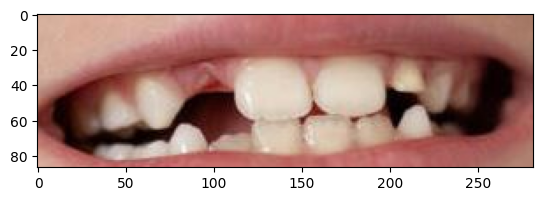

In [10]:
# Sample of hypodontia
hypodontiaimg=Image.open("/kaggle/working/oral-diseases/hypodontia/(25).JPG")
plt.imshow(hypodontiaimg)

In [11]:
!pip install torch torchvision transformers

In [12]:
import os
import torch
import torchvision
from torchvision import transforms
from torch.utils.data import DataLoader, Dataset
from transformers import ViTForImageClassification
from transformers import ViTFeatureExtractor
import torch.nn as nn
import torch.optim as optim
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt


/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [13]:
from PIL import Image
import numpy as np

class KidneyDataset(Dataset):
    def __init__(self, root_dir, feature_extractor):
        self.root_dir = root_dir
        self.feature_extractor = feature_extractor
        self.classes = ['caries', 'gingivitis', 'toothDiscoloration', 'ulcers', 'hypodontia', 'calculus']
        self.data = []
        for idx, cls in enumerate(self.classes):
            path = os.path.join(root_dir, cls)
            for img in os.listdir(path):
                self.data.append((os.path.join(path, img), idx))

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        img_path, label = self.data[idx]
        image = Image.open(img_path)  # Load image as PIL image
        image = image.resize((224, 224))  # Resize image

        # Convert the PIL image to a NumPy array
        image = np.array(image)

        # Check if the image has an alpha channel (4 channels), and if so, remove it
        if image.shape[-1] == 4:
            image = image[..., :3]

        image = self.feature_extractor(images=image, return_tensors="pt").pixel_values[0]
        return image, label



root_dir = "/kaggle/working/oral-diseases"
feature_extractor = ViTFeatureExtractor.from_pretrained('google/vit-base-patch16-224-in21k')
dataset = KidneyDataset(root_dir, feature_extractor)

# Split the dataset into train and test sets
train_size = int(0.8 * len(dataset))
test_size = len(dataset) - train_size
train_dataset, test_dataset = torch.utils.data.random_split(dataset, [train_size, test_size])

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

preprocessor_config.json:   0%|          | 0.00/160 [00:00<?, ?B/s]

/opt/conda/lib/python3.10/site-packages/transformers/models/vit/feature_extraction_vit.py:28: FutureWarning: The class ViTFeatureExtractor is deprecated and will be removed in version 5 of Transformers. Please use ViTImageProcessor instead.
  warnings.warn(


In [14]:
class ViTClassifier(nn.Module):
    def __init__(self, num_classes):
        super(ViTClassifier, self).__init__()
        self.vit = ViTForImageClassification.from_pretrained('google/vit-base-patch16-224-in21k')
        self.vit.classifier = nn.Linear(self.vit.classifier.in_features, num_classes)

    def forward(self, x):
        x = self.vit(pixel_values=x).logits
        return x

model = ViTClassifier(num_classes=6)


config.json:   0%|          | 0.00/502 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/346M [00:00<?, ?B/s]

Some weights of ViTForImageClassification were not initialized from the model checkpoint at google/vit-base-patch16-224-in21k and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_recall_fscore_support


In [16]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [17]:
train_losses = []
train_accuracies = []
num_epochs = 100

for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    correct = 0
    total = 0
    for inputs, labels in train_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    epoch_loss = running_loss / len(train_loader)
    epoch_acc = correct / total
    train_losses.append(epoch_loss)
    train_accuracies.append(epoch_acc)

    print(f'Epoch {epoch + 1}, Loss: {epoch_loss}, Accuracy: {epoch_acc}')


Epoch 1, Loss: 1.7520585211172497, Accuracy: 0.22623900450547094
Epoch 2, Loss: 1.7298272227587765, Accuracy: 0.24415361510405492
Epoch 3, Loss: 1.4953991186945406, Accuracy: 0.3767431881570478
Epoch 4, Loss: 1.295923579433193, Accuracy: 0.46492169062432953
Epoch 5, Loss: 1.1770536403541696, Accuracy: 0.5174855181291569
Epoch 6, Loss: 1.0755103263136458, Accuracy: 0.560394765071873
Epoch 7, Loss: 0.9872992434730269, Accuracy: 0.5919330615747693
Epoch 8, Loss: 0.9274166981651358, Accuracy: 0.6218622613173139
Epoch 9, Loss: 0.8904509159595999, Accuracy: 0.6397768719158978
Epoch 10, Loss: 0.8341968558626632, Accuracy: 0.659193306157477
Epoch 11, Loss: 0.8012042241553737, Accuracy: 0.6750697275262819
Epoch 12, Loss: 0.7606957146566208, Accuracy: 0.6921261531860116
Epoch 13, Loss: 0.7462707124140164, Accuracy: 0.6993134520489166
Epoch 14, Loss: 0.7243632755867423, Accuracy: 0.7063934777944647
Epoch 15, Loss: 0.6855748084514108, Accuracy: 0.7253808195666166
Epoch 16, Loss: 0.6551780956861091

In [18]:
model.eval()
all_preds = []
all_labels = []
with torch.no_grad():
    for inputs, labels in test_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        outputs = model(inputs)
        _, preds = torch.max(outputs, 1)
        all_preds.extend(preds.cpu().numpy())
        all_labels.extend(labels.cpu().numpy())

accuracy = accuracy_score(all_labels, all_preds)
precision, recall, f1, _ = precision_recall_fscore_support(all_labels, all_preds, average='macro')
print(f"Accuracy: {accuracy}\nPrecision: {precision}\nRecall: {recall}\nF1 Score: {f1}")
print(classification_report(all_labels, all_preds, target_names=['caries', 'gingivitis', 'toothDiscoloration', 'ulcers', 'hypodontia', 'calculus']))

# Confusion Matrix
conf_matrix = confusion_matrix(all_labels, all_preds)
print(conf_matrix)


Accuracy: 0.7563277563277563
Precision: 0.7571651224880669
Recall: 0.7455785090289941
F1 Score: 0.7493921078857695
                    precision    recall  f1-score   support

            caries       0.79      0.70      0.74       454
        gingivitis       0.67      0.77      0.72       469
toothDiscoloration       0.80      0.69      0.74       365
            ulcers       0.87      0.90      0.89       514
        hypodontia       0.86      0.79      0.83       238
          calculus       0.56      0.62      0.58       291

          accuracy                           0.76      2331
         macro avg       0.76      0.75      0.75      2331
      weighted avg       0.76      0.76      0.76      2331

[[320  34  41  31  14  14]
 [  7 359   8   1   5  89]
 [ 34  23 253  36   3  16]
 [ 29   1  14 463   7   0]
 [ 11  14   0   0 189  24]
 [  5 103   2   0   2 179]]


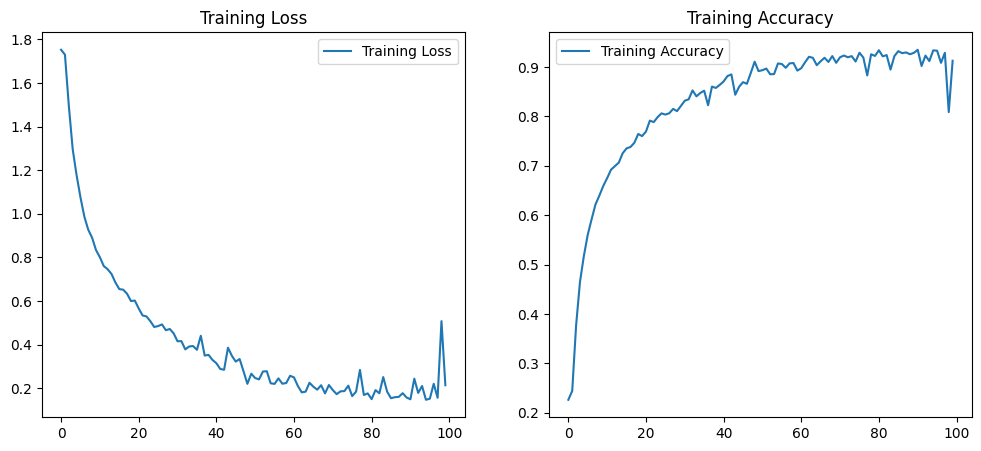

In [19]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(train_losses, label='Training Loss')
plt.title('Training Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(train_accuracies, label='Training Accuracy')
plt.title('Training Accuracy')
plt.legend()

plt.show()


In [20]:
df = pd.DataFrame({
    'Model': ['ViTClassifier'],
    'Accuracy': [accuracy],
    'Precision': [precision],
    'Recall': [recall],
    'F1 Score': [f1]
})
df.to_csv('model_performance.csv', index=False)


In [21]:
np.savetxt("confusion_matrix.csv", conf_matrix, delimiter=",", fmt='%d')


In [22]:
torch.save(model.state_dict(), 'vit_kidney_disease_classifier.pth')

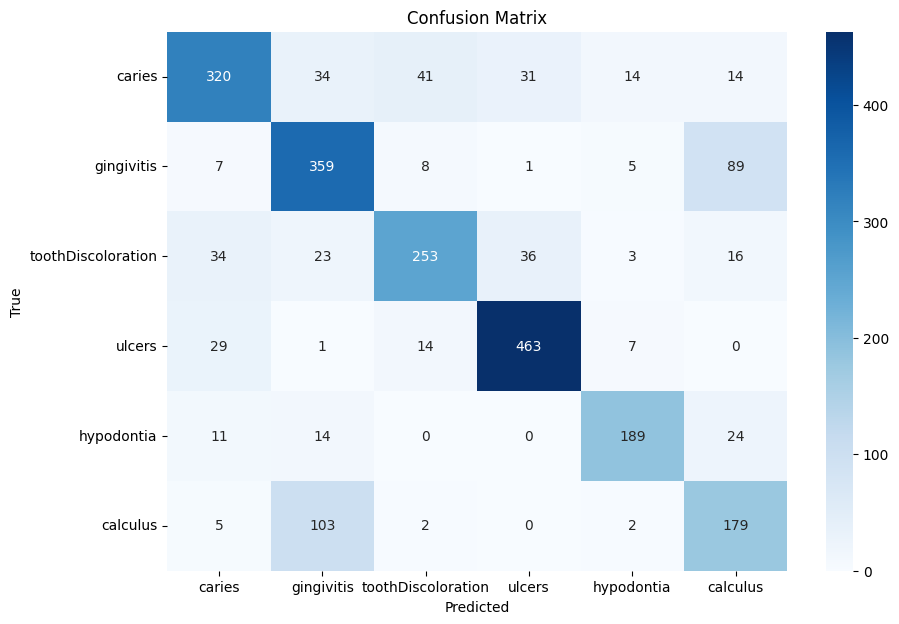

In [23]:
import seaborn as sns

# Assuming `conf_matrix` is your confusion matrix obtained from the evaluation step
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['caries', 'gingivitis', 'toothDiscoloration', 'ulcers', 'hypodontia', 'calculus'], yticklabels=['caries', 'gingivitis', 'toothDiscoloration', 'ulcers', 'hypodontia', 'calculus'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.savefig('confusion_matrix.png')
plt.show()


In [24]:
model_path = '/kaggle/working/vit_kidney_disease_classifier.pth'
model.load_state_dict(torch.load(model_path))
model.eval()  # Set the model to evaluation mode


ViTClassifier(
  (vit): ViTForImageClassification(
    (vit): ViTModel(
      (embeddings): ViTEmbeddings(
        (patch_embeddings): ViTPatchEmbeddings(
          (projection): Conv2d(3, 768, kernel_size=(16, 16), stride=(16, 16))
        )
        (dropout): Dropout(p=0.0, inplace=False)
      )
      (encoder): ViTEncoder(
        (layer): ModuleList(
          (0-11): 12 x ViTLayer(
            (attention): ViTAttention(
              (attention): ViTSelfAttention(
                (query): Linear(in_features=768, out_features=768, bias=True)
                (key): Linear(in_features=768, out_features=768, bias=True)
                (value): Linear(in_features=768, out_features=768, bias=True)
                (dropout): Dropout(p=0.0, inplace=False)
              )
              (output): ViTSelfOutput(
                (dense): Linear(in_features=768, out_features=768, bias=True)
                (dropout): Dropout(p=0.0, inplace=False)
              )
            )
            (int

In [25]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

all_preds = []
all_labels = []
with torch.no_grad():
    for inputs, labels in test_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        outputs = model(inputs)
        _, preds = torch.max(outputs, 1)
        all_preds.extend(preds.cpu().numpy())
        all_labels.extend(labels.cpu().numpy())

# Calculate accuracy and other metrics if needed
accuracy = accuracy_score(all_labels, all_preds)
print(f'Accuracy: {accuracy}')

# Print the classification report
print(classification_report(all_labels, all_preds, target_names=['caries', 'gingivitis', 'toothDiscoloration', 'ulcers', 'hypodontia', 'calculus']))


Accuracy: 0.7563277563277563
                    precision    recall  f1-score   support

            caries       0.79      0.70      0.74       454
        gingivitis       0.67      0.77      0.72       469
toothDiscoloration       0.80      0.69      0.74       365
            ulcers       0.87      0.90      0.89       514
        hypodontia       0.86      0.79      0.83       238
          calculus       0.56      0.62      0.58       291

          accuracy                           0.76      2331
         macro avg       0.76      0.75      0.75      2331
      weighted avg       0.76      0.76      0.76      2331

